# WB4 - Supply & Demand Analysis
---

In [3]:
#import libraries
#############################

import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import plotly.graph_objects as go

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

---
Workbook 4 (WB4) build on top of the previously condeucted analysis and adds the persepctive of supply and demand economics in the labor market. For detailed insights and interpretation of the outlined results please refer to the report.

---

In [4]:
#load data

############################# Kaggle Survey #############################
#load cleaned dataset
df_ks = pd.read_csv('/project/DATA/Kaggle_Survey/Data_Cleaning/CLEANED_valid_responses.csv')

############################# Glassdoor #############################
#load country codes
df_cc = pd.read_csv('/project/DATA/Glassdoor_Listings/country_names_2_digit_codes.csv')

#load listing data
df_gd = pd.read_csv('/project/DATA/Glassdoor_Listings/glassdoor.csv')

In [5]:
df_gd = pd.merge(df_gd, df_cc, left_on='map.country', right_on='Code', how='left')
df_gd.dropna(subset=['Name'], inplace=True)
#df_gd.groupby(['Name']).count()

In [6]:
#data cleaning of countries w/ Glassdoor
####################################
df_gd['Name'] = df_gd.Name.fillna(df_gd['map.country'])
df_gd = df_gd.drop(['map.country', 'Code'], axis=1)
df_gd.head()
#country name saved in column 'Name'

,benefits.benefitRatingDecimal,benefits.comments,benefits.highlights,benefits.numRatings,benefits.employerSummary,breadCrumbs,gaTrackerData.category,gaTrackerData.empId,gaTrackerData.empName,gaTrackerData.empSize,gaTrackerData.expired,gaTrackerData.industry,gaTrackerData.industryId,gaTrackerData.jobId.long,gaTrackerData.jobId.int,gaTrackerData.jobTitle,gaTrackerData.location,gaTrackerData.locationId,gaTrackerData.locationType,gaTrackerData.pageRequestGuid.guid,gaTrackerData.pageRequestGuid.guidValid,gaTrackerData.pageRequestGuid.part1,gaTrackerData.pageRequestGuid.part2,gaTrackerData.sector,gaTrackerData.sectorId,gaTrackerData.profileConversionTrackingParams.trackingCAT,gaTrackerData.profileConversionTrackingParams.trackingSRC,gaTrackerData.profileConversionTrackingParams.trackingXSP,gaTrackerData.jobViewTrackingResult.jobViewDisplayTimeMillis,gaTrackerData.jobViewTrackingResult.requiresTracking,gaTrackerData.jobViewTrackingResult.trackingUrl,header.adOrderId,header.advertiserType,header.applicationId,header.applyButtonDisabled,header.applyUrl,header.blur,header.coverPhoto,header.easyApply,header.employerId,header.employerName,header.expired,header.gocId,header.hideCEOInfo,header.jobTitle,header.locId,header.location,header.locationType,header.logo,header.logo2x,header.organic,header.overviewUrl,header.posted,header.rating,header.saved,header.savedJobId,header.sgocId,header.sponsored,header.userAdmin,header.uxApplyType,header.featuredVideo,header.normalizedJobTitle,header.urgencyLabel,header.urgencyLabelForMessage,header.urgencyMessage,header.needsCommission,header.payHigh,header.payLow,header.payMed,header.payPeriod,header.salaryHigh,header.salaryLow,header.salarySource,job.description,job.discoverDate,job.eolHashCode,job.importConfigId,job.jobReqId.long,job.jobReqId.int,job.jobSource,job.jobTitleId,job.listingId.long,job.listingId.int,map.employerName,map.lat,map.lng,map.location,map.address,map.postalCode,overview.allBenefitsLink,overview.allPhotosLink,overview.allReviewsLink,overview.allSalariesLink,overview.foundedYear,overview.hq,overview.industry,overview.industryId,overview.revenue,overview.sector,overview.sectorId,overview.size,overview.stock,overview.type,overview.description,overview.mission,overview.website,overview.allVideosLink,overview.competitors,overview.companyVideo,photos,rating.ceo.name,rating.ceo.photo,rating.ceo.photo2x,rating.ceo.ratingsCount,rating.ceoApproval,rating.recommendToFriend,rating.starRating,reviews,salary.country.cc3LetterISO,salary.country.ccISO,salary.country.continent.continentCode,salary.country.continent.continentName,salary.country.continent.id,salary.country.continent.new,salary.country.countryFIPS,salary.country.currency.currencyCode,salary.country.currency.defaultFractionDigits,salary.country.currency.displayName,salary.country.currency.id,salary.country.currency.name,salary.country.currency.negativeTemplate,salary.country.currency.new,salary.country.currency.positiveTemplate,salary.country.currency.symbol,salary.country.currencyCode,salary.country.defaultLocale,salary.country.defaultName,salary.country.defaultShortName,salary.country.employerSolutionsCountry,salary.country.id,salary.country.longName,salary.country.major,salary.country.name,salary.country.new,salary.country.population,salary.country.shortName,salary.country.tld,salary.country.type,salary.country.uniqueName,salary.country.usaCentricDisplayName,salary.currency.currencyCode,salary.currency.defaultFractionDigits,salary.currency.displayName,salary.currency.id,salary.currency.name,salary.currency.negativeTemplate,salary.currency.new,salary.currency.positiveTemplate,salary.currency.symbol,salary.lastSalaryDate,salary.salaries,wwfu,Name
1,4.0,2802.0,2802.0,3,NaN,2802,-1,10416,Boehringer Ingelheim,10000--1,False,Biotech & Pharmaceuticals,200021,3.406582e+09,NaN,Quality Manager - Boehringer Ingelheim Healthc...,NaN,3183562,CITY,0000016e56d0b5cfa19a4b2ba225a2ee,True,1573414548943,-6802041636413660434,Biotech & Pharmaceuticals,

In [7]:
#initial data cleaning of job titles w/ Glassdoor
####################################

#find matching job listings 
listings_before = df_gd.shape[0]

#list of job titles as seen in Kaggle Survey dataset
titles = ['data scientist','software engineer','data analyst', 
          'research scientist', 'business analyst','data engineer',
          'statistician', 'dba', 'database engineer',
          'machine learning engineer', 'product manager', 'project manager']

#mask for each job title
job_masks = [df_gd['gaTrackerData.jobTitle'].str.contains(titles, flags=re.IGNORECASE, regex=True) for titles in titles]

df_gd = df_gd.rename(columns={'gaTrackerData.jobTitle':'titles'})
combined_mask = np.vstack(job_masks).any(axis=0)
combined_mask

#remove everythin that does not fit Kaggle Q4 format of job titles
title_regex = '|'.join(titles)
df_gd.titles = df_gd.titles.str.findall(title_regex, flags=re.IGNORECASE)
df_gd.titles = df_gd.titles.str[0]
df_gd.titles = df_gd.titles.str.title()
#df_gd.head()

df_gd['titles'].value_counts()

#df_gd = df_gd[['jobtitle','gaTrackerData.sector','overview.industry','job.jobSource','overview.foundedYear']]
df_gd = df_gd[['titles', 'Name']]

#output format
print('-'*5, 'Glassdoor','-'*5)
print(df_gd['titles'].value_counts())
print('-'*30)
print('-'*5, 'Kaggle Survey','-'*5)
print(df_ks['Q5'].value_counts())

----- Glassdoor -----
Software Engineer            12342
Project Manager              12156
Business Analyst              7477
Product Manager               6189
Data Scientist                5098
Data Analyst                  4526
Data Engineer                 3866
Machine Learning Engineer      600
Research Scientist             511
Dba                            502
Statistician                   286
Database Engineer              275
Name: titles, dtype: int64
------------------------------
----- Kaggle Survey -----
Data Scientist             3431
Data/Software Engineer     2768
Business/Data Analyst      1950
Researcher                 1460
Product/Project Manager     613
DBA/Database Engineer       132
Name: Q5, dtype: int64


In [8]:
#match job titles even further 
####################################

#Business/Data Analyst
df_gd.titles[df_gd['titles']=='Business Analyst'] = 'Business/Data Analyst'
df_gd.titles[df_gd['titles']=='Data Analyst'] = 'Business/Data Analyst'

#Researcher
df_gd.titles[df_gd['titles']=='Research Scientist'] = 'Researcher'
df_gd.titles[df_gd['titles']=='Statistician'] = 'Researcher'

#Data/Software Engineer
df_gd.titles[df_gd['titles']=='Data Engineer'] = 'Data/Software Engineer'
df_gd.titles[df_gd['titles']=='Software Engineer'] = 'Data/Software Engineer'
df_gd.titles[df_gd['titles']=='Machine Learning Engineer'] = 'Data/Software Engineer'

#DBA/Database Engineer
df_gd.titles[df_gd['titles']=='Dba'] = 'DBA/Database Engineer'
df_gd.titles[df_gd['titles']=='Database Engineer'] = 'DBA/Database Engineer'

#Product/Project Manager
df_gd.titles[df_gd['titles']=='Project Manager'] = 'Product/Project Manager'
df_gd.titles[df_gd['titles']=='Product Manager'] = 'Product/Project Manager'

#output format
print('-'*5, 'Glassdoor','-'*5)
print(df_gd['titles'].value_counts())
print('-'*30),print('-'*30)
print('-'*5, 'Kaggle Survey','-'*5)
print(df_ks['Q5'].value_counts())

----- Glassdoor -----
Product/Project Manager    18345
Data/Software Engineer     16808
Business/Data Analyst      12003
Data Scientist              5098
Researcher                   797
DBA/Database Engineer        777
Name: titles, dtype: int64
------------------------------
------------------------------
----- Kaggle Survey -----
Data Scientist             3431
Data/Software Engineer     2768
Business/Data Analyst      1950
Researcher                 1460
Product/Project Manager     613
DBA/Database Engineer       132
Name: Q5, dtype: int64


In [9]:
df_add = pd.DataFrame([['Researcher','China'],['DBA/Database Engineer','China']],columns=['titles','Name'])
df_gd = df_gd.append(df_add)

In [10]:
#df_gd[df_gd['titles']=='Researcher'].groupby('Name').count()
#DBA/Database Engineer

In [11]:
#data engineering (Glassdoor data)
####################################

#dropping product/ project managers due to data anomalies (as described in the report)
df_gd = df_gd[df_gd['titles']!='Product/Project Manager']
df_ks = df_ks[df_ks['Q5']!='Product/Project Manager']

#treat missing valuess
df_gd = df_gd.fillna(0)
df_gd = df_gd[df_gd['titles']!=0]
df_gd = df_gd[df_gd['Name']!=0]
df_gd.head()

#df_gd.groupby('Name').count()

,titles,Name
13,Business/Data Analyst,Belgium
19,Data/Software Engineer,Namibia
22,Data Scientist,Namibia
24,Data/Software Engineer,Namibia
26,Data/Software Engineer,Namibia


In [12]:
#job title by country (Kaggle data)
####################################
df_ks = df_ks.rename({'Q5':'job_title', 'Q3':'Country'}, axis='columns')
df_ks = df_ks[['job_title','Country']]
df_ks

,job_title,Country
0,Data/Software Engineer,France
1,Data/Software Engineer,India
2,Data Scientist,France
3,Data Scientist,India
4,Data Scientist,United States of America
...,...,...
10349,Data Scientist,India
10350,Business/Data Analyst,Brazil
10351,Data Scientist,India
10352,Data Scientist,India


In [13]:
#share of job title by country table (Glassdoor data)
#######################################

#get data copy
df_gd_overall = df_gd.copy()

#transform to include dummies and calucate share
df_gd_overall_dummies = pd.DataFrame(pd.get_dummies(df_gd_overall['titles']))
df_gd_overall = pd.DataFrame(df_gd_overall_dummies.merge(df_gd['Name'],left_index=True, right_index=True)).groupby('Name').mean()

#output
#df_gd_overall.tail()
df_gd_overall.head()

,Business/Data Analyst,DBA/Database Engineer,Data Scientist,Data/Software Engineer,Researcher
Name,,,,,
Argentina,0.201550,0.000000,0.131783,0.627907,0.038760
Australia,0.569857,0.014301,0.044004,0.358636,0.013201
Austria,0.287383,0.004673,0.088785,0.612150,0.007009
Bahamas,0.000000,1.000000,0.000000,0.000000,0.000000
Belarus,0.272727,0.000000,0.000000,0.727273,0.000000


In [14]:
#share of job title by country table (Kaggle data)
#######################################
#get copy
df_ks_overall = df_ks.copy()

#transform to include dummies and calucate share
df_ks_overall_dummies = pd.DataFrame(pd.get_dummies(df_ks_overall['job_title']))
df_ks_overall = pd.DataFrame(df_ks_overall_dummies.merge(df_ks['Country'],left_index=True, right_index=True)).groupby('Country').mean()

#output
df_ks_overall
df_ks_overall.head()

,Business/Data Analyst,DBA/Database Engineer,Data Scientist,Data/Software Engineer,Researcher
Country,,,,,
Algeria,0.250000,0.035714,0.178571,0.214286,0.321429
Argentina,0.168675,0.012048,0.349398,0.301205,0.168675
Australia,0.244898,0.013605,0.421769,0.190476,0.129252
Austria,0.058824,0.000000,0.323529,0.323529,0.294118
Bangladesh,0.160000,0.020000,0.180000,0.380000,0.260000


In [15]:
#further outputs used for analysis

#df_gd[df_gd['Name']=='China'].tail(52)
#df_ks[df_ks['Country']=='China']
#df_gd.groupby('Name').count().tail(41)

### Visualization: Given Country by Job Title Distribution for Kaggle & Glassdoor

In [16]:
#prep visualization
#######################################

#insert desired country of interest
country = 'United States of America'#'India' #'Brazil'#'China'#
country_gd = 'United States'#'India' #'Brazil'#'China' #

df_gd_filter =  df_gd[df_gd['Name']==country_gd].copy()
df_ks_filter =  df_ks[df_ks['Country']==country].copy()

#calculate relative shares
df_gd_jobsorted = df_gd_filter.groupby(['titles']).count().reset_index()
df_gd_jobsorted['relative_share'] = df_gd_jobsorted['Name']/df_gd_jobsorted['Name'].sum()*100
df_gd_jobsorted = df_gd_jobsorted.drop('Name', axis=1)

df_ks_jobsorted = df_ks_filter[['job_title','Country']].groupby(['job_title']).count().reset_index()
df_ks_jobsorted['relative_share'] = df_ks_jobsorted['Country']/df_ks_jobsorted['Country'].sum()*100
df_ks_jobsorted = df_ks_jobsorted.drop('Country', axis=1)

print(df_gd_jobsorted)
print(df_ks_jobsorted)

                   titles  relative_share
0   Business/Data Analyst       39.301310
1   DBA/Database Engineer        0.545852
2          Data Scientist       20.742358
3  Data/Software Engineer       32.532751
4              Researcher        6.877729
                job_title  relative_share
0   Business/Data Analyst       20.100188
1   DBA/Database Engineer        1.440200
2          Data Scientist       41.077019
3  Data/Software Engineer       23.481528
4              Researcher       13.901064


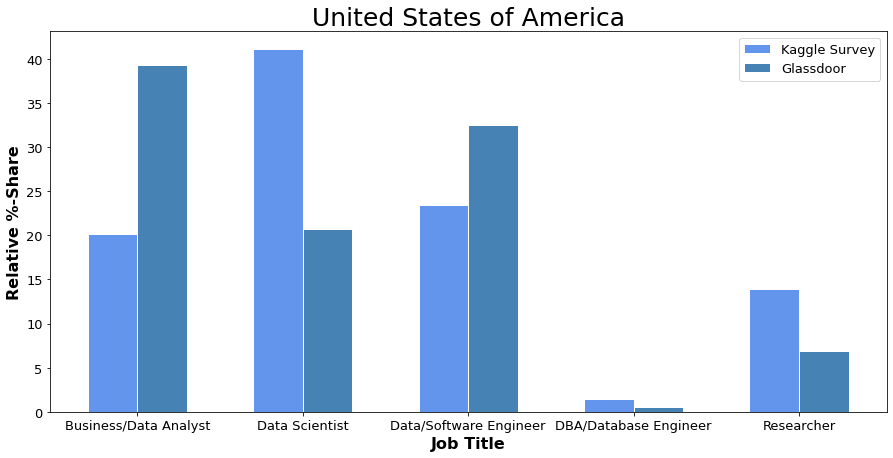

In [17]:
#visualization (1) - bar chart
#######################################

# set width of bar
barWidth = 0.3

#insert job title
title1 = 'Business/Data Analyst'
title2 = 'Data Scientist'
title3 = 'Data/Software Engineer'
title4 = 'DBA/Database Engineer'
#title5 = 'Product/Project Manager'
title6 = 'Researcher'

# set height of bar
bars1  = [float(df_ks_jobsorted.relative_share[df_ks_jobsorted['job_title']==title1]),
          float(df_ks_jobsorted.relative_share[df_ks_jobsorted['job_title']==title2]),
          float(df_ks_jobsorted.relative_share[df_ks_jobsorted['job_title']==title3]),
          float(df_ks_jobsorted.relative_share[df_ks_jobsorted['job_title']==title4]),
          float(df_ks_jobsorted.relative_share[df_ks_jobsorted['job_title']==title6])]

bars2  = [float(df_gd_jobsorted.relative_share[df_gd_jobsorted['titles']==title1]),
          float(df_gd_jobsorted.relative_share[df_gd_jobsorted['titles']==title2]),
          float(df_gd_jobsorted.relative_share[df_gd_jobsorted['titles']==title3]),
          float(df_gd_jobsorted.relative_share[df_gd_jobsorted['titles']==title4]),
          float(df_gd_jobsorted.relative_share[df_gd_jobsorted['titles']==title6])]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
#r3 = [x + barWidth for x in r2]
#r4 = [x + barWidth for x in r3]
#r5 = [x + barWidth for x in r4]

fig= plt.figure(figsize=(15,7))

# Make the plot
plt.bar(r1, bars1, color='cornflowerblue', width=barWidth, edgecolor='white', label='Kaggle Survey')
plt.bar(r2, bars2, color='steelblue', width=barWidth, edgecolor='white', label='Glassdoor')
#plt.bar(r3, bars3, color='royalblue', width=barWidth, edgecolor='white', label="Bachelor's Degree")
#plt.bar(r4, bars4, color='blue', width=barWidth, edgecolor='white', label="Master's Degree")
#plt.bar(r5, bars5, color='darkblue', width=barWidth, edgecolor='white', label='Doctoral Degree')

#add mean compensation
#plt.axhline(y=grouped_multiple['comp_mean'].mean(), color='grey', linestyle='--',label="Mean Compensation")

# Add xticks on the middle of the group bars
plt.xlabel('Job Title',size=16,fontweight='bold')
plt.ylabel('Relative %-Share',size=16,fontweight='bold')

plt.title(country, size=25)

plt.xticks([r + barWidth*0.5 for r in range(len(bars1))], [title1,title2,title3,title4,title6],size=13)
plt.yticks(size=13)

# Create legend & Show graphic
plt.legend(fontsize=13)
#plt.figure(figsize=(600,70))
fig.show()

United States of America


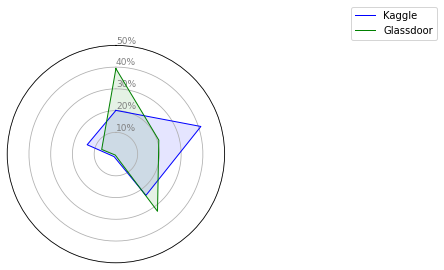

In [18]:
#visualization (1) - radar chart
#######################################

#code source: https://python-graph-gallery.com/radar-chart/

#import required libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

#set job titles
title1 = 'Business/Data Analyst'
title2 = 'Data Scientist'
title3 = 'Data/Software Engineer'
title4 = 'DBA/Database Engineer'
#title5 = 'Product/Project Manager'
title6 = 'Researcher'
 
#request data from previous data prep.
df = pd.DataFrame({
'group': ['Kaggle','Glassdoor'],
title1: [float(df_ks_jobsorted.relative_share[df_ks_jobsorted['job_title']==title1]),
         float(df_gd_jobsorted.relative_share[df_gd_jobsorted['titles']==title1])],
title2: [float(df_ks_jobsorted.relative_share[df_ks_jobsorted['job_title']==title2]),
         float(df_gd_jobsorted.relative_share[df_gd_jobsorted['titles']==title2])],
title3: [float(df_ks_jobsorted.relative_share[df_ks_jobsorted['job_title']==title3]),
        float(df_gd_jobsorted.relative_share[df_gd_jobsorted['titles']==title3])],
title4: [float(df_ks_jobsorted.relative_share[df_ks_jobsorted['job_title']==title4]),
        float(df_gd_jobsorted.relative_share[df_gd_jobsorted['titles']==title4])],
title6: [float(df_ks_jobsorted.relative_share[df_ks_jobsorted['job_title']==title6]),
        float(df_gd_jobsorted.relative_share[df_gd_jobsorted['titles']==title6])]
})


### visualization background ###
categories=list(df)[1:]
N = len(categories)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
plt.xticks([])

ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50], ["10%","20%","30%",'40%','50%'], color="grey", size=9)
plt.ylim(0,50)
 
### visualization plots ###
#1st plot
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles,values,linewidth=1,linestyle='solid',color='blue',label='Kaggle')
ax.fill(angles, values, 'blue', alpha=0.1)
 
#2nd plot
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles,values,linewidth=1,linestyle='solid',color='green',label='Glassdoor')
ax.fill(angles, values, 'green', alpha=0.1)

#add legend 
plt.legend(loc='upper right', bbox_to_anchor=(2,1.2))

### visualization output ###
print(country)

---